<a href="https://colab.research.google.com/github/S1xzy/statkku/blob/main/Case2_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 2: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: **หมูหัน**

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายธีรภัทร เจริญกิจ - Problem 1&2&3
2. นายศุภวิชญ์ ไชยงาม - Problem 1&2&3 & Presentation Slides
3. ...
4. ...

กำหนดส่ง: พฤหัสบดี 6 กุมภาพันธ์ 2568 \
รายงานในชั้นเรียน: ศุกร์ 7 กุมภาพันธ์ 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
<font color='red'>หมายเหตุ: ไม่ต้องนำเสนอ Problem 1 ให้แสดงเพียงผล Wordcloud ที่ได้</font>

#### Read JSON file

In [ ]:
# ----------------- Your code here -----------------
file = open('/content/drive/MyDrive/Basic Data Science/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)
mydata = json.loads(d)

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
# ----------------- Your code here -----------------
mydata

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [ ]:
type(mydata)

dict

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------
#The total number of tweets collected in the file:
mydata.keys()
len(mydata)

29

In [ ]:
#The content of the first tweet:
mydata[list(mydata.keys())[0]]['content']

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

In [ ]:
#Is the first tweet contained any hashtags or mentions?
c = 0

hashtag_checker = mydata[list(mydata.keys())[c]]['hashtags']
mentions_checker = mydata[list(mydata.keys())[c]]['mentions']

if hashtag_checker == [] and mentions_checker == []:
  print("The first tweet does not contain any hashtags or mentions")
else:
  print("The first tweet contains hashtags or mentions")

The first tweet does not contain any hashtags or mentions


In [ ]:
mydata[key]

{'tweet_id': '1564761905410875392',
 'username': 'moanfIeur',
 'name': '',
 'profile_picture': 'https://twitter.com/moanfIeur/photo',
 'replies': 0,
 'retweets': 0,
 'likes': 0,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:48:04+00:00',
 'content': 'Tinggal cari duitnya aja ini mah kalo di Thailand bisa pake Qris',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
 'link': ''}

In [ ]:
#Collect all hashtags related to Thailand from this data:
pprint.pprint(mydata)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
pd.read_json(StringIO(d), orient = 'index').head()

tweet_id        username  \
2019-08-02 16:54:53.038882816  1564764893038882816      matthunter   
2019-08-02 16:54:26.598080513  1564764866598080512      DavSmithVP   
2019-08-02 16:54:05.685280772  1564764845685280768    DailyPattaya   
2019-08-02 16:51:50.804897792  1564764710804897792   Bryan62766077   
2019-08-02 16:47:48.277612549  1564764468277612544  Megan_and_Grrr   

                                                         name  \
2019-08-02 16:54:53.038882816                     MATT HUNTΞR   
2019-08-02 16:54:26.598080513  DavSmith / Virtual Photography   
2019-08-02 16:54:05.685280772               The Pattaya Daily   
2019-08-02 16:51:50.804897792                           Bryan   
2019-08-02 16:47:48.277612549                           Megan   

                                                        profile_picture  \
2019-08-02 16:54:53.038882816      https://twitter.com/matthunter/photo   
2019-08-02 16:54:26.598080513      https://twitter.com/DavSmithVP/photo   
2019-08-02 16:54:05.685280772    https://twitter.com/DailyPattaya/photo   
2019-08-02 16:51:50.804897792   https://twitter.com/Bryan62766077/photo   
2019-08-02 16:47:48.277612549  https://twitter.com/Megan_and_Grrr/photo   

                               replies  retweets  likes  is_retweet  \
2019-08-02 16:54:53.038882816        2         1      7       False   
2019-08-02 16:54:26.598080513        0         0      2       False   
2019-08-02 16:54:05.685280772        0         0      0       False   
2019-08-02 16:51:50.804897792        1         0      1       False   
2019-08-02 16:47:48.277612549        0         0      0       False   

                                            posted_time  \
2019-08-02 16:54:53.038882816 2022-08-30 23:59:57+00:00   
2019-08-02 16:54:26.598080513 2022-08-30 23:59:50+00:00   
2019-08-02 16:54:05.685280772 2022-08-30 23:59:45+00:00   
2019-08-02 16:51:50.804897792 2022-08-30 23:59:13+00:00   
2019-08-02 16:47:48.277612549 2022-08-30 23:58:15+00:00   

                                                                         content  \
2019-08-02 16:54:53.038882816  Thanks for asking! Yes, we will support shippi...   
2019-08-02 16:54:26.598080513  Tomb Raider Underworld | Thailand \n#VirtualPh...   
2019-08-02 16:54:05.685280772  The latest The Pattaya Daily! http://thepattay...   
2019-08-02 16:51:50.804897792  You can live some places for next to nothing, ...   
2019-08-02 16:47:48.277612549  ALIEN HOUSE is a story of love, hope and alien...   

                                                  hashtags  \
2019-08-02 16:54:53.038882816                           []   
2019-08-02 16:54:26.598080513         [VirtualPhotography]   
2019-08-02 16:54:05.685280772          [thailand, pattaya]   
2019-08-02 16:51:50.804897792                           []   
2019-08-02 16:47:48.277612549  [fantasy, extraterrestrial]   

                                                    mentions  \
2019-08-02 16:54:53.038882816                             []   
2019-08-02 16:54:26.598080513  [tombraider, crystaldynamics]   
2019-08-02 16:54:05.685280772         [PopeKael, ASEANNOWTH]   
2019-08-02 16:51:50.804897792                             []   
2019-08-02 16:47:48.277612549                             []   

                                                                          images  \
2019-08-02 16:54:53.038882816                                                 []   
2019-08-02 16:54:26.598080513  [https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...   
2019-08-02 16:54:05.685280772                                                 []   
2019-08-02 16:51:50.804897792                                                 []   
2019-08-02 16:47:48.277612549  [https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...   

                              videos  \
2019-08-02 16:54:53.038882816     []   
2019-08-02 16:54:26.598080513     []   
2019-08-02 16:54:05.685280772     []   
2019-08-02 16:51:50.804897792     []   
2019-08-02 16:47:48.277612549

In [ ]:
hashtags = ""
for key in list(mydata.keys()):
  a_hashtags = mydata[key]['hashtags']
  hashtags = hashtags + " " + " ".join(a_hashtags)

In [ ]:
hashtags_lowercase = hashtags.lower()
hashtags_lowercase

'  virtualphotography thailand pattaya  fantasy extraterrestrial 4 ohmpawat ย donnypangilinan faraway theotherside marktuan  icymi  pattaya thailand sda2022 voteforppkritt ppkritt       lisa lalisa money jayb 제이비 got7 갓세븐 cdnza def   zunshine  เปกผล peckpalitchoke   '

In [ ]:

# Define Keywords related to Thailand
thailand_keywords = {"thailand", "pattaya", "ohmpawat", "ppkritt", "peckpalitchoke", "เปกผล"}

# Split the data into individual words/hashtags
words = hashtags_lowercase.split()

# Collect hashtags related to Thailand
thailand_hashtags = [word for word in words if word.lower() in thailand_keywords]

# Print the results
print("Hashtags related to Thailand:", thailand_hashtags)

Hashtags related to Thailand: ['thailand', 'pattaya', 'ohmpawat', 'pattaya', 'thailand', 'ppkritt', 'เปกผล', 'peckpalitchoke']


In [ ]:
#Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
"""
Find the most popular tweets in your collection of tweets, i.e.
the tweets with the largest number of retweet/replies/likes counts
"""
pd.read_json(StringIO(d), orient = 'index').head()

tweet_id        username  \
2019-08-02 16:54:53.038882816  1564764893038882816      matthunter   
2019-08-02 16:54:26.598080513  1564764866598080512      DavSmithVP   
2019-08-02 16:54:05.685280772  1564764845685280768    DailyPattaya   
2019-08-02 16:51:50.804897792  1564764710804897792   Bryan62766077   
2019-08-02 16:47:48.277612549  1564764468277612544  Megan_and_Grrr   

                                                         name  \
2019-08-02 16:54:53.038882816                     MATT HUNTΞR   
2019-08-02 16:54:26.598080513  DavSmith / Virtual Photography   
2019-08-02 16:54:05.685280772               The Pattaya Daily   
2019-08-02 16:51:50.804897792                           Bryan   
2019-08-02 16:47:48.277612549                           Megan   

                                                        profile_picture  \
2019-08-02 16:54:53.038882816      https://twitter.com/matthunter/photo   
2019-08-02 16:54:26.598080513      https://twitter.com/DavSmithVP/photo   
2019-08-02 16:54:05.685280772    https://twitter.com/DailyPattaya/photo   
2019-08-02 16:51:50.804897792   https://twitter.com/Bryan62766077/photo   
2019-08-02 16:47:48.277612549  https://twitter.com/Megan_and_Grrr/photo   

                               replies  retweets  likes  is_retweet  \
2019-08-02 16:54:53.038882816        2         1      7       False   
2019-08-02 16:54:26.598080513        0         0      2       False   
2019-08-02 16:54:05.685280772        0         0      0       False   
2019-08-02 16:51:50.804897792        1         0      1       False   
2019-08-02 16:47:48.277612549        0         0      0       False   

                                            posted_time  \
2019-08-02 16:54:53.038882816 2022-08-30 23:59:57+00:00   
2019-08-02 16:54:26.598080513 2022-08-30 23:59:50+00:00   
2019-08-02 16:54:05.685280772 2022-08-30 23:59:45+00:00   
2019-08-02 16:51:50.804897792 2022-08-30 23:59:13+00:00   
2019-08-02 16:47:48.277612549 2022-08-30 23:58:15+00:00   

                                                                         content  \
2019-08-02 16:54:53.038882816  Thanks for asking! Yes, we will support shippi...   
2019-08-02 16:54:26.598080513  Tomb Raider Underworld | Thailand \n#VirtualPh...   
2019-08-02 16:54:05.685280772  The latest The Pattaya Daily! http://thepattay...   
2019-08-02 16:51:50.804897792  You can live some places for next to nothing, ...   
2019-08-02 16:47:48.277612549  ALIEN HOUSE is a story of love, hope and alien...   

                                                  hashtags  \
2019-08-02 16:54:53.038882816                           []   
2019-08-02 16:54:26.598080513         [VirtualPhotography]   
2019-08-02 16:54:05.685280772          [thailand, pattaya]   
2019-08-02 16:51:50.804897792                           []   
2019-08-02 16:47:48.277612549  [fantasy, extraterrestrial]   

                                                    mentions  \
2019-08-02 16:54:53.038882816                             []   
2019-08-02 16:54:26.598080513  [tombraider, crystaldynamics]   
2019-08-02 16:54:05.685280772         [PopeKael, ASEANNOWTH]   
2019-08-02 16:51:50.804897792                             []   
2019-08-02 16:47:48.277612549                             []   

                                                                          images  \
2019-08-02 16:54:53.038882816                                                 []   
2019-08-02 16:54:26.598080513  [https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...   
2019-08-02 16:54:05.685280772                                                 []   
2019-08-02 16:51:50.804897792                                                 []   
2019-08-02 16:47:48.277612549  [https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...   

                              videos  \
2019-08-02 16:54:53.038882816     []   
2019-08-02 16:54:26.598080513     []   
2019-08-02 16:54:05.685280772     []   
2019-08-02 16:51:50.804897792     []   
2019-08-02 16:47:48.277612549

In [ ]:
#the tweets with the largest number of retweet
mydata_json_pd = pd.read_json(StringIO(d), orient = 'index').head()
largest_retweet = mydata_json_pd[['tweet_id', 'username', 'name', 'retweets']].sort_values(by = 'retweets', ascending = False).iloc[0]
largest_retweet

tweet_id    1564764893038882816
username             matthunter
name                MATT HUNTΞR
retweets                      1
Name: 2019-08-02 16:54:53.038882816, dtype: object

In [ ]:
#the tweets with the largest number of replies
mydata_json_pd = pd.read_json(StringIO(d), orient = 'index').head()
largest_replies = mydata_json_pd[['tweet_id', 'username', 'name', 'replies']].sort_values(by = 'replies', ascending = False).iloc[0]
largest_replies

tweet_id    1564764893038882816
username             matthunter
name                MATT HUNTΞR
replies                       2
Name: 2019-08-02 16:54:53.038882816, dtype: object

In [ ]:
#the tweets with the largest number of likes
mydata_json_pd = pd.read_json(StringIO(d), orient = 'index').head()
largest_likes = mydata_json_pd[['tweet_id', 'username', 'name', 'likes']].sort_values(by = 'likes', ascending = False).iloc[0]
largest_likes

tweet_id    1564764893038882816
username             matthunter
name                MATT HUNTΞR
likes                         7
Name: 2019-08-02 16:54:53.038882816, dtype: object

In [ ]:
"""
Display the top 5 tweets that are the most popular among your collection
สามารถใช้ np.argsort(<list>)[:5] ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ np.argsort(<list>)[::-1][:5] จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า
"""
#Assume x is the array of retweets
x = np.array(mydata_json_pd['retweets'])
y = np.array(mydata_json_pd['replies'])
z = np.array(mydata_json_pd['likes'])

#the order from the most to least
print(np.argsort(x)[::-1][:5])
print(np.argsort(y)[::-1][:5])
print(np.argsort(z)[::-1][:5])

[0 4 3 2 1]
[0 3 4 2 1]
[0 1 3 4 2]


In [ ]:
mix_contents = ""
for key in list(mydata.keys()):
  a_content = mydata[key]['content']
  mix_contents = mix_contents + " " + a_content

#make all lowercase
  mix_contents = mix_contents.lower()

#Tokenize the mix_content
import nltk
mix_contents_token = word_tokenize(mix_contents)

# Create stopword list:
my_stopwords = set(stopwords.words('english'))
my_stopwords.update(["https"])
my_stopwords.update(["com"])

mix_contents_stopwords = [word for word in mix_contents_token if word.lower() not in my_stopwords]
print(mix_contents_stopwords)

['thanks', 'asking', '!', 'yes', ',', 'support', 'shipping', 'countries', ',', 'including', 'japan', 'thailand', '.', 'tomb', 'raider', 'underworld', '|', 'thailand', '#', 'virtualphotography', '@', 'tombraider', '@', 'crystaldynamics', 'latest', 'pattaya', 'daily', '!', 'http', ':', '//thepattayadaily.com', 'thanks', '@', 'popekael', '@', 'aseannowth', '#', 'thailand', '#', 'pattaya', 'live', 'places', 'next', 'nothing', ',', 'believe', '.', 'pay', '$', '300', 'month', 'really', 'nice', 'apartment', 'thailand', '.', 'utilities', 'included', '.', 'deposit', '.', 'close', 'beach', '.', 'live', 'music', 'clubs', 'everywhere', '.', 'meals', '$', '2', 'alien', 'house', 'story', 'love', ',', 'hope', 'alien', 'intervention', 'set', 'wales', ',', 'thailand', 'inner', 'space', '.', "'s", '#', 'fantasy', 'story', '#', 'extraterrestrial', 'contact', 'conflict', 'man', 'inner', 'voice', 'alter', 'ego', '.', 'william', 'sure', "'s", 'going', 'mad', ':', '//smarturl.it/alien-house-eng', '?', 'iqid=

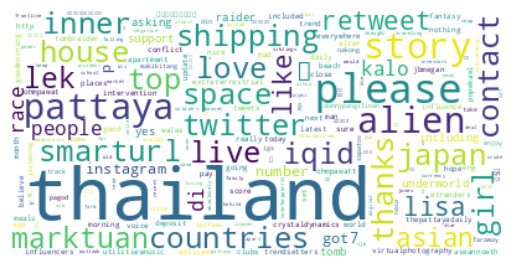

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = my_stopwords, background_color = "white").generate(mix_contents)
wordcloud

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/Basic Data Science"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"
myDirectory_reviewFilePath = "/content/drive/MyDrive/Basic Data Science/yelp_academic_dataset_review.json"
myDirectory_businessFilePath = "/content/drive/MyDrive/Basic Data Science/yelp_academic_dataset_business.json"
myDirectory_userFilePath = "/content/drive/MyDrive/Basic Data Science/yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory_reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory_businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory_userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0  

[5 rows x 22 columns]

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

review_id                 user_id             business_id  \
0      KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1      BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2      saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3      AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4      Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
...                       ...                     ...                     ...   
99995  pAEbIxvr6ebx2bHc1XvguA  SMH5CeiLvKx61lKwtLZ_PA  lV0k3BnslFRkuWD_kbKd0Q   
99996  xH1AoE-4nf2ECGQJRjO4_g  2clTdtp-BjphxLjN83CpUA  G0xz3kyRhRi6oZl7KfR0pA   
99997  GatIbXTz-WDru5emONUSIg  MRrN6DH3QGCFcDv5RENYVg  C4lZdhasjZVQyDlOiXY1sA   
99998  6NfkodAdhvI89xONXuBC3A  rnNQzeKJbvqVCsYsL10mkQ  dChRGpit9fM_kZK5pafNyA   
99999  sJ1BMq7lkKgOWEFx3n6ZRw  _BcWyKQL16ndpBdggh2kNA  hMcgO98QaOFmQVTfCUeGzw   

       stars_review  useful_review_business  funny_review_business  \
0               3.0                       0                      0   
1               5.0                       1                      0   
2               3.0                       0                      0   
3               5.0                       1                      0   
4               4.0                       1                      0   
...             ...                     ...                    ...   
99995           4.0                       0                      0   
99996           1.0                       1                      0   
99997           4.0                       0                      0   
99998           2.0                       0                      0   
99999           5.0                       0                      0   

       cool_review_business  \
0                         0   
1                         1   
2                         0   
3                         1   
4                         1   
...                     ...   
99995                     0   
99996                     0   
99997                     0   
99998                     0   
99999                     0   

                                                    text                 date  \
0      If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1      I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
2      Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
3      Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03   
4      Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15   
...                                                  ...                  ...   
99995  Came here for lunch with a group. They were bu...  2018-05-30 22:28:56   
99996  The equipment is so old and so felty! I just u...  2015-04-05 23:31:52   
99997  This is one of my favorite Mexican restaurants...  2016-06-04 00:59:15   
99998  Came here for brunch - had an omlette ($19 + t...  2018-06-11 12:45:08   
99999  Came in for my 5-6 month prophy and saw Kara -...  2013-06-06 10:10:33   

                 name_review_business  ... compliment_more compliment_profile  \
0        Turning Point of North Wales  ...               0                  0   
1          Body Cycle Spinning Studio  ...               0                  0   
2                   Kettle Restaurant  ...              14                  3   
3                               Zaika  ...               1                  0   
4                                Melt  ...               0                  0   
...                               ...  ...             ...                ...   
99995                     Metro Diner  ...               0                  0   
99996                 Esporta Fitness  ...               0                  0   
99997  Buena Vista Mexican Restaurant  ...               0                  0   
99998                        The Love  ...        

### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

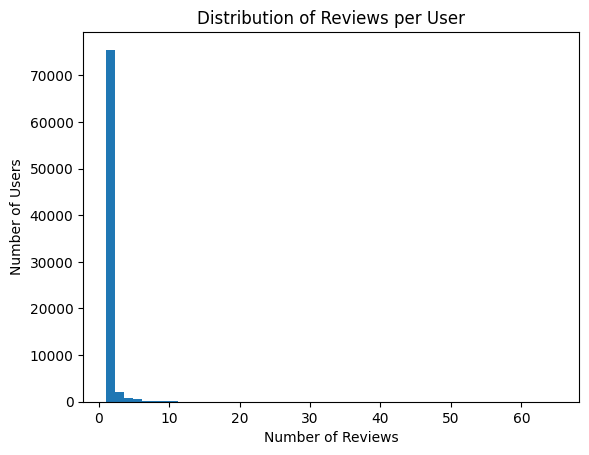

count    79345.000000
mean         1.260319
std          0.956611
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         65.000000
Name: count, dtype: float64


In [ ]:
# ----------------- Your code here -----------------
# ----------------- Your code here -----------------
# นับจำนวนรีวิวที่แต่ละ user ให้
review_counts = df['user_id'].value_counts()

# แสดงการแจกแจง
plt.hist(review_counts, bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')
plt.show()

# แสดงสถิติเพิ่มเติม
print(review_counts.describe())

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

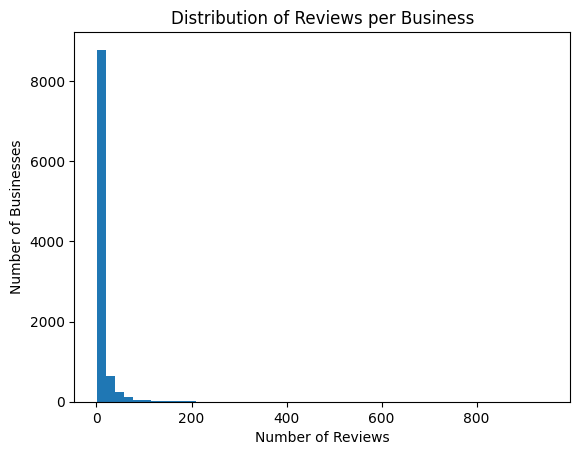

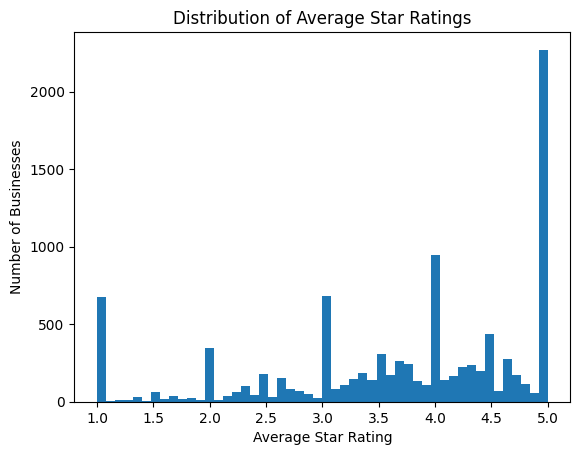

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: count, dtype: float64
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: stars_review, dtype: float64


In [ ]:
# ----------------- Your code here -----------------
# ----------------- Your code here -----------------
# นับจำนวนรีวิวที่แต่ละ business ได้รับ
review_counts_per_business = df['business_id'].value_counts()

# นับจำนวนดาวเฉลี่ยที่แต่ละ business ได้รับ
average_stars_per_business = df.groupby('business_id')['stars_review'].mean()

# แสดงการแจกแจงของจำนวนรีวิว
plt.hist(review_counts_per_business, bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Reviews per Business')
plt.show()

# แสดงการแจกแจงของจำนวนดาวเฉลี่ย
plt.hist(average_stars_per_business, bins=50)
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Average Star Ratings')
plt.show()

# แสดงสถิติเพิ่มเติม
print(review_counts_per_business.describe())
print(average_stars_per_business.describe())

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
# ----------------- Your code here -----------------
# ----------------- Your code here -----------------
from collections import Counter
import pandas as pd

# แยก categories ออกเป็น category ย่อย
all_categories = []
for index, row in businesses.iterrows():
    if isinstance(row['categories'], str):  # ตรวจสอบว่า categories เป็น string หรือไม่
        categories = row['categories'].split(', ')
        all_categories.extend(categories)

# นับจำนวน category ย่อย
category_counts = Counter(all_categories)

# สร้าง DataFrame จาก category_counts
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_df.index.name = 'Category'

# แสดงตาราง
print(category_df)

                              Count
Category                           
Doctors                        3763
Traditional Chinese Medicine    174
Naturopathic/Holistic           221
Acupuncture                     424
Health & Medical              11890
...                             ...
Hospitalists                      1
Serbo Croatian                    1
Ceremonial Clothing               1
Bubble Soccer                     1
Trade Fairs                       1

[1311 rows x 1 columns]


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

จุดประสงค์ของการศึกษา

**1.เพื่อระบุประเภทธุรกิจที่มีศักยภาพสูงสุดในแต่ละพื้นที่**

**2.เพื่อทำความเข้าใจความต้องการของผู้บริโภคในแต่ละพื้นที่**

**3.เพื่อวางแผนการพัฒนาเศรษฐกิจในท้องถิ่น**

#CODE 1

In [ ]:
# ----------------- Your code here -----------------
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# สร้าง dropdown menu สำหรับเลือก state
state_dropdown = widgets.Dropdown(
    options=df['state'].unique(),
    description='Select State:',
    disabled=False,
)

# ฟังก์ชันสำหรับสร้าง Pie Chart
def create_pie_chart(state):
    state_data = df[df['state'] == state]
    all_categories = []
    for index, row in state_data.iterrows():
        if isinstance(row['categories'], str):
            categories = row['categories'].split(', ')
            all_categories.extend(categories)
    category_counts = pd.Series(all_categories).value_counts()
    top_categories = category_counts.head(5)
    plt.figure(figsize=(8, 8))
    plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 5 Popular Business Categories in {state}')
    plt.show()

# เชื่อมต่อ dropdown menu กับฟังก์ชันสร้าง Pie Chart
widgets.interactive(create_pie_chart, state=state_dropdown)

interactive(children=(Dropdown(description='Select State:', options=('PA', 'AZ', 'LA', 'CA', 'FL', 'IN', 'MO',…

#CODE 2

In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# สร้าง Dropdown Menu สำหรับเลือก State
state_dropdown = widgets.Dropdown(
    options=df['state'].unique(),
    description='Select State:',
    disabled=False,
)

# ฟังก์ชันสำหรับสร้างแผนภูมิแท่งแบบ Stacked
def create_stacked_bar_chart(state):
    # กรองข้อมูลเฉพาะ State ที่เลือก
    state_data = df[df['state'] == state]

    # คำนวณจำนวนธุรกิจและคะแนนรีวิวเฉลี่ยสำหรับแต่ละ Category
    category_data = state_data.groupby('categories').agg(
        num_businesses=('business_id', 'count'),
        avg_stars=('stars_review', 'mean')
    ).reset_index()

    # เลือก Top 5 Categories ตามจำนวนธุรกิจ
    top_categories = category_data.sort_values('num_businesses', ascending=False).head(5)

    # สร้างแผนภูมิแท่งแบบ Stacked
    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = [0] * len(top_categories)  # กำหนดจุดเริ่มต้นของแต่ละแท่ง

    for category in top_categories['categories']:
        category_data_filtered = category_data[category_data['categories'] == category]
        ax.bar(
            state,
            category_data_filtered['num_businesses'],
            bottom=bottom,
            label=category
        )
        bottom += category_data_filtered['num_businesses'].values  # อัพเดทจุดเริ่มต้นสำหรับแท่งถัดไป

    ax.set_xlabel('State')
    ax.set_ylabel('Number of Businesses')
    ax.set_title(f'Distribution of Business Categories and Average Star Ratings in {state}')
    ax.legend(title='Business Category')
    plt.show()

# เชื่อมต่อ Dropdown Menu กับฟังก์ชันสร้างแผนภูมิ
widgets.interactive(create_stacked_bar_chart, state=state_dropdown)

interactive(children=(Dropdown(description='Select State:', options=('PA', 'AZ', 'LA', 'CA', 'FL', 'IN', 'MO',…

#CODE 3

In [ ]:
!pip install folium
import folium
import pandas as pd
# จัดกลุ่มข้อมูลตามรหัสไปรษณีย์ และคำนวณความหนาแน่นและคะแนนรีวิวเฉลี่ย
business_density = businesses.groupby('postal_code').agg(
    num_businesses=('business_id', 'count'),
    avg_stars=('stars', 'mean'),
    latitude=('latitude', 'mean'),  # ใช้ latitude เฉลี่ยของธุรกิจในพื้นที่นั้น
    longitude=('longitude', 'mean')  # ใช้ longitude เฉลี่ยของธุรกิจในพื้นที่นั้น
).reset_index()
# สร้างแผนที่โดยกำหนดตำแหน่งเริ่มต้น
map_center = [business_density['latitude'].mean(), business_density['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# เพิ่ม Bubble Markers ลงในแผนที่
for index, row in business_density.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['num_businesses'] / 10,  # ปรับขนาด Bubble ตามความหนาแน่น
        popup=f"Postal Code: {row['postal_code']}<br>Avg Stars: {row['avg_stars']:.2f}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_map)

# แสดงแผนที่
my_map

## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here
!pip install requests
import requests

In [ ]:
r1 = requests.get('https://en.wikipedia.org/wiki/Foreign_exchange_market')
r2 = requests.get('https://en.wikiversity.org/wiki/Forex_Trading')
r3 = requests.get('https://en.wikipedia.org/wiki/Currency')
r4 = requests.get('https://en.wikipedia.org/wiki/List_of_circulating_currencies')
r5 = requests.get('https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html')
r6 = requests.get('https://www.investopedia.com/terms/f/foreign-exchange.asp')
r7 = requests.get('https://www.forexfactory.com/thread/8560-foreign-exchange-market-from-wikipedia')
r8 = requests.get('https://marketswiki.com/wiki/Foreign_exchange')
r9 = requests.get('https://en.wikipedia.org/wiki/Investment')
r10 = requests.get('https://en.wikipedia.org/wiki/Risk_management')

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
soup1 = BeautifulSoup(r1.content, 'html.parser')
soup2 = BeautifulSoup(r2.content, 'html.parser')
soup3 = BeautifulSoup(r3.content, 'html.parser')
soup4 = BeautifulSoup(r4.content, 'html.parser')
soup5 = BeautifulSoup(r5.content, 'html.parser')
soup6 = BeautifulSoup(r6.content, 'html.parser')
soup7 = BeautifulSoup(r7.content, 'html.parser')
soup8 = BeautifulSoup(r8.content, 'html.parser')
soup9 = BeautifulSoup(r9.content, 'html.parser')
soup10 = BeautifulSoup(r10.content, 'html.parser')



<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Foreign exchange market - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width

In [ ]:
text1 = soup1.get_text(strip = True)
text2 = soup2.get_text(strip = True)
text3 = soup3.get_text(strip = True)
text4 = soup4.get_text(strip = True)
text5 = soup5.get_text(strip = True)
text6 = soup6.get_text(strip = True)
text7 = soup7.get_text(strip = True)
text8 = soup8.get_text(strip = True)
text9 = soup9.get_text(strip = True)
text10 = soup10.get_text(strip = True)

In [ ]:
!pip install urllib3
import urllib.request

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here
all_text = " ".join([text1, text2, text3, text4, text5, text6, text7, text8, text9, text10])
all_text

#lowercase
all_text = all_text.lower()
all_text

#Tokenize
import nltk
tokens = word_tokenize(all_text)

#clear stopwords
my_stopwords = set(stopwords.words('english'))
my_stopwords.update(["https"])
my_stopwords.update(["com"])
my_stopwords.update([","])
my_stopwords.update(["."])


my_stopwords = set(stopwords.words('english'))  # Use NLTK's built-in stopwords
filtered_tokens = [word for word in tokens if word.lower() not in my_stopwords]


print(filtered_tokens)

['foreign', 'exchange', 'market', '-', 'wikipediajump', 'contentmain', 'menumain', 'menumove', 'sidebarhidenavigationmain', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'uscontributehelplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filesearchsearchappearancedonatecreate', 'accountlog', 'inpersonal', 'toolsdonatecreate', 'accountlog', 'inpages', 'logged', 'editorslearn', 'morecontributionstalkcontentsmove', 'sidebarhide', '(', 'top', ')', '1historytoggle', 'history', 'subsection1.1ancient1.2medieval', 'later1.3early', 'modern1.4modern', 'post-modern1.4.1after', 'world', 'war', 'ii1.4.2markets', 'close1.4.3after', '19732market', 'size', 'liquidity3market', 'participantstoggle', 'market', 'participants', 'subsection3.1commercial', 'companies3.2central', 'banks3.3foreign', 'exchange', 'fixing3.4investment', 'management', 'firms3.5retail', 'foreign', 'exchange', 'traders3.6non-bank', 'foreign', 'exchange', 'companies3.7money', 'transfer/remittance'

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

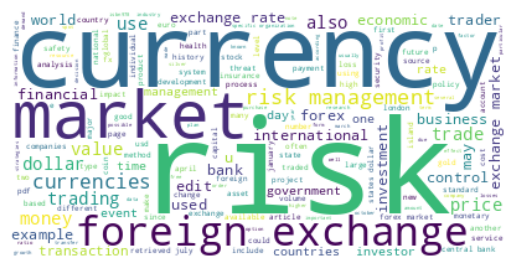

In [ ]:
#----------------------------------------------
# Your code starts here
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = my_stopwords, background_color = "white").generate(all_text)
wordcloud

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Count the most word in all_text
# Count word frequencies
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

word_counts = Counter(tokens)

# Print the word frequencies
print("Word Frequency Count:")
for word, count in word_counts.most_common(10):  # Show top 10 words
    print(f"{word}: {count}")

# Find the most frequent word
most_common_word, most_common_count = word_counts.most_common(1)[0]
print(f"\nMost Frequent Word: '{most_common_word}' (Count: {most_common_count})")

Word Frequency Count:
,: 1867
the: 1488
of: 1040
.: 1028
and: 849
to: 636
(: 577
): 577
in: 540
a: 525

Most Frequent Word: ',' (Count: 1867)


In [ ]:
# Split text into sentences using the full stop `.`
sentences = all_text.split('.')

# Remove empty strings and strip spaces
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Print the sentences
print("Sentences:", sentences)


Sentences: ['foreign exchange market - wikipediajump to contentmain menumain menumove to sidebarhidenavigationmain pagecontentscurrent eventsrandom articleabout wikipediacontact uscontributehelplearn to editcommunity portalrecent changesupload filesearchsearchappearancedonatecreate accountlog inpersonal toolsdonatecreate accountlog inpages for logged out editorslearn morecontributionstalkcontentsmove to sidebarhide(top)1historytoggle history subsection1', '1ancient1', '2medieval and later1', '3early modern1', '4modern to post-modern1', '4', '1after world war ii1', '4', '2markets close1', '4', '3after 19732market size and liquidity3market participantstoggle market participants subsection3', '1commercial companies3', '2central banks3', '3foreign exchange fixing3', '4investment management firms3', '5retail foreign exchange traders3', '6non-bank foreign exchange companies3', '7money transfer/remittance companies and bureaux de change4most traded currencies by value5determinants of exchange

In [ ]:
#Deep Learning named spacy
import spacy
nlp = spacy.load("en_core_web_sm")

# Process text
doc = nlp(all_text)

# Extract sentences
sentences = [sent.text for sent in doc.sents]

print("Sentences:", sentences)

Sentences: ['foreign exchange market - wikipediajump to contentmain menumain menumove to sidebarhidenavigationmain pagecontentscurrent eventsrandom articleabout wikipediacontact uscontributehelplearn to editcommunity portalrecent changesupload filesearchsearchappearancedonatecreate accountlog inpersonal toolsdonatecreate accountlog inpages for logged out editorslearn morecontributionstalkcontentsmove to sidebarhide(top)1historytoggle history subsection1.1ancient1.2medieval and later1.3early modern1.4modern to post-modern1.4.1after world war ii1.4.2markets close1.4.3after 19732market size and liquidity3market participantstoggle market participants subsection3.1commercial companies3.2central banks3.3foreign exchange fixing3.4investment management firms3.5retail foreign exchange traders3.6non-bank foreign exchange companies3.7money transfer/remittance companies and bureaux de change4most traded currencies by value5determinants of exchange ratestoggle determinants of exchange rates', 'subs

In [ ]:
# Process text
doc = nlp(all_text)

# Extract sentences
sentences = [sent.text for sent in doc.sents]

# Print sentences in the requested format
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")

Sentence 1: foreign exchange market - wikipediajump to contentmain menumain menumove to sidebarhidenavigationmain pagecontentscurrent eventsrandom articleabout wikipediacontact uscontributehelplearn to editcommunity portalrecent changesupload filesearchsearchappearancedonatecreate accountlog inpersonal toolsdonatecreate accountlog inpages for logged out editorslearn morecontributionstalkcontentsmove to sidebarhide(top)1historytoggle history subsection1.1ancient1.2medieval and later1.3early modern1.4modern to post-modern1.4.1after world war ii1.4.2markets close1.4.3after 19732market size and liquidity3market participantstoggle market participants subsection3.1commercial companies3.2central banks3.3foreign exchange fixing3.4investment management firms3.5retail foreign exchange traders3.6non-bank foreign exchange companies3.7money transfer/remittance companies and bureaux de change4most traded currencies by value5determinants of exchange ratestoggle determinants of exchange rates
Sentence

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **